<a href="https://colab.research.google.com/github/Debayan2004/BR-Tumor-Segmentation/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 42.8 MB/s eta 0:00:00


In [2]:
import os
import random
import rasterio
import matplotlib.pyplot as plt

In [3]:
def visualize_samples(image_dir, mask_dir, set_name, num_samples=4):
    # Get all image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.tif')]

    # Randomly select samples
    selected_images = random.sample(image_files, num_samples)

    # Create a figure to display the images
    plt.figure(figsize=(12, 8))

    for i, image_name in enumerate(selected_images):
        # Read the image
        with rasterio.open(os.path.join(image_dir, image_name)) as img:
            image_data = img.read(1)  # Read the first band

        # Read the corresponding mask
        mask_name = image_name  # Assuming mask names match image names
        with rasterio.open(os.path.join(mask_dir, mask_name)) as mask:
            mask_data = mask.read(1)  # Read the first band

        # Plotting
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(image_data, cmap='gray')
        plt.title(f'{set_name} Image: {image_name}')
        plt.axis('off')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(mask_data, cmap='gray')
        plt.title(f'{set_name} Mask: {mask_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
# Define your directories
output_directory = '/content/drive/MyDrive/data_split'

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


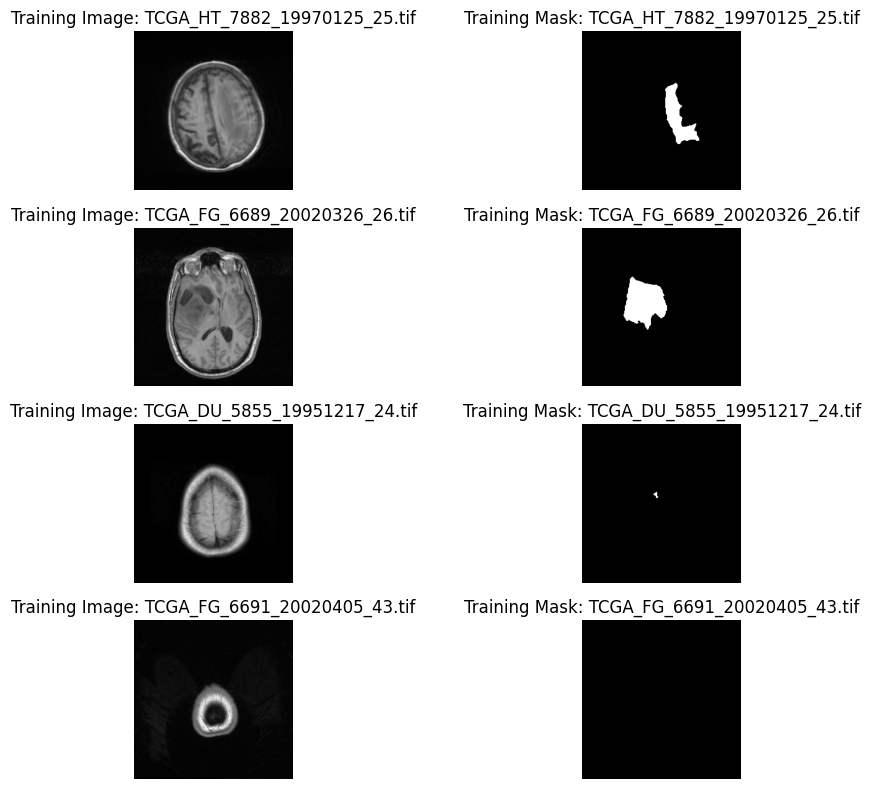

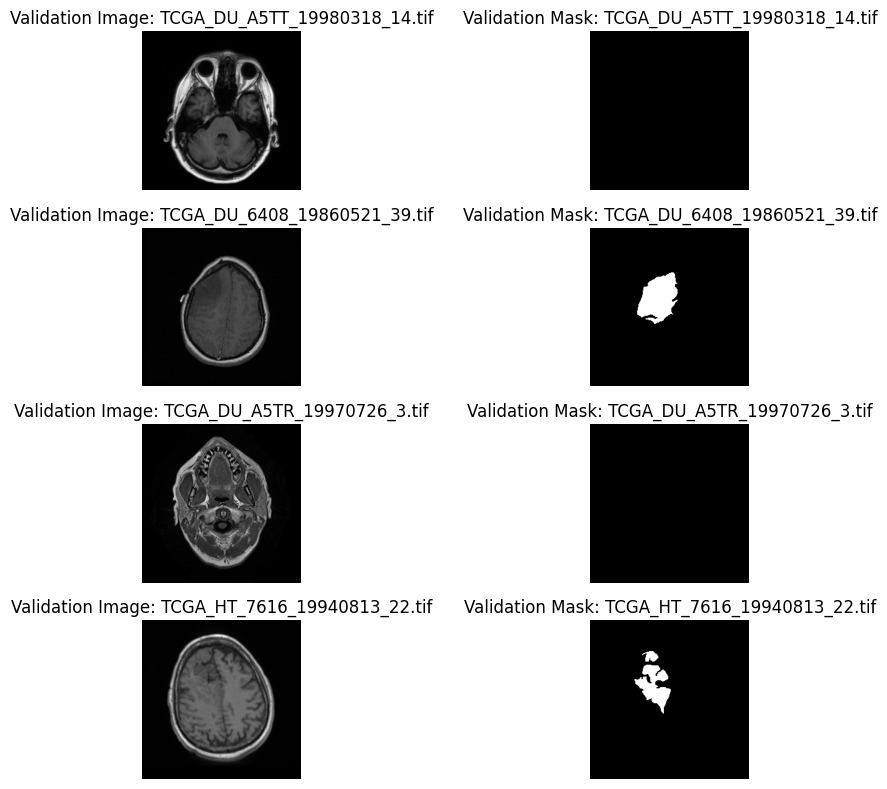

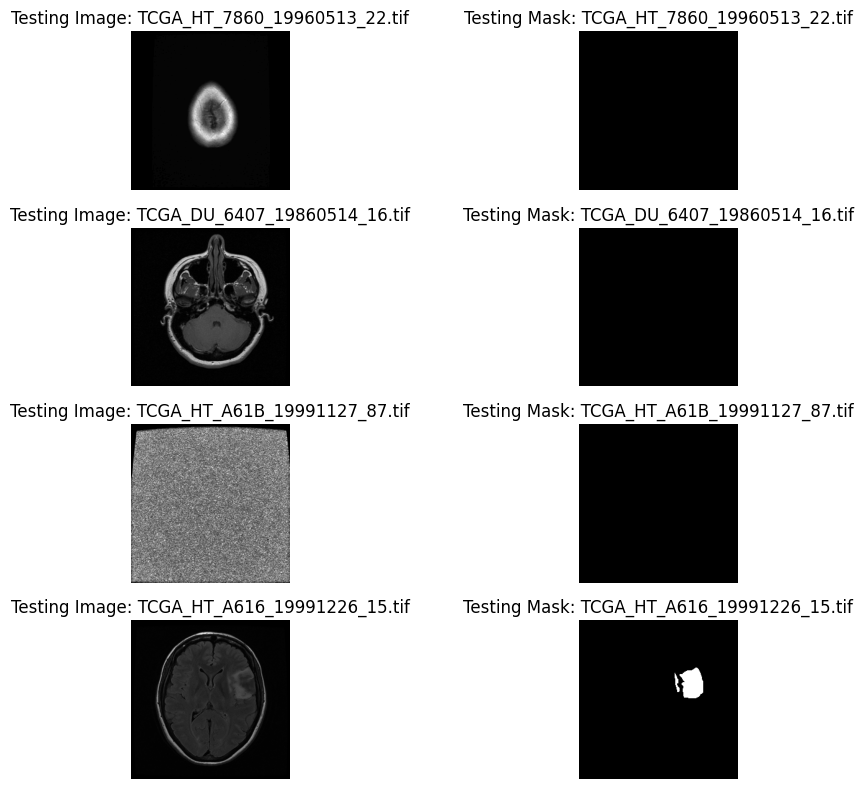

In [5]:
# Visualize samples from train, valid, and test sets
visualize_samples(os.path.join(output_directory, 'train/images'),
                  os.path.join(output_directory, 'train/masks'), 'Training')

visualize_samples(os.path.join(output_directory, 'valid/images'),
                  os.path.join(output_directory, 'valid/masks'), 'Validation')

visualize_samples(os.path.join(output_directory, 'test/images'),
                  os.path.join(output_directory, 'test/masks'), 'Testing')